<a href="https://colab.research.google.com/github/RaianaSeixas/Portifolio/blob/main/Python_for_Finance/Web_Scraping_Yahoo_Finance_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 6] # mudar área dos gráficos

In [9]:
# Dados de entrada
ticket='PETR4.SA'
index='^BVSP'
hoje= datetime.date(datetime.now())
data_inicial= hoje - timedelta(days =364)  # data há 52 semanas atrás a partir de hoje
#print(data_inicial)
invest_inicial=1000

In [10]:
conjunto= ticket+ ' '+index  #juntar ação e indice no formato adequado para download dos dados
print(conjunto)
data = yf.download(conjunto, start=data_inicial)
fechamento=data['Close']
fechamento.describe()

PETR4.SA ^BVSP
[*********************100%***********************]  2 of 2 completed


,PETR4.SA,^BVSP
count,249.000000,249.000000
mean,29.649036,113766.333333
std,2.533841,7824.903343
min,24.650000,100775.000000
25%,27.730000,107370.000000
50%,29.120001,112282.000000
75%,31.870001,118885.000000
max,36.200001,130776.000000


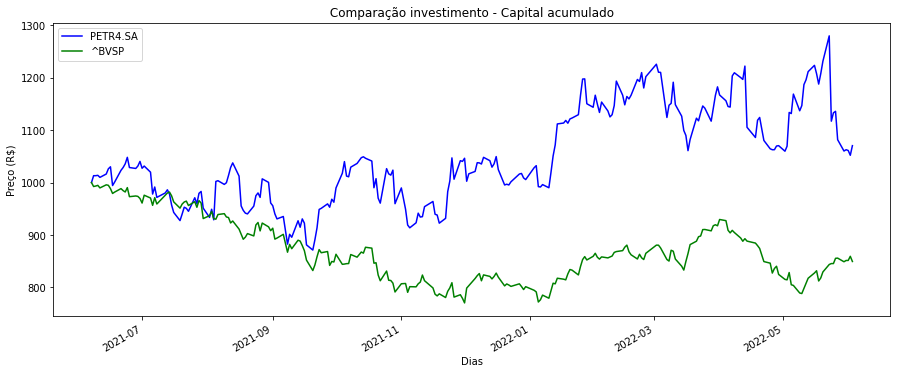

In [11]:
x = data['Close'].pct_change()
x.iloc[0]=0 # retorno = 0 no ponto inicial 
returns = (x + 1).cumprod()*invest_inicial
returns.plot(color=['b', 'g'] )
plt.title(' Comparação investimento - Capital acumulado ')
plt.ylabel('Preço (R$)')
plt.xlabel('Dias')
plt.show()

In [12]:
# Montante final
invest_final=returns.iloc[-1]
invest_final=pd.DataFrame(invest_final).T
invest_final

,PETR4.SA,^BVSP
2022-06-03,1070.342867,849.559552
